# Project 3

## Prompt

- **Dataset(s) to be used:** [Access to electricity (% of population)](https://data360.worldbank.org/en/indicator/WB_SE4ALL_EG_ACS_ELEC) & [Urban population (% of total population)](https://data360.worldbank.org/en/indicator/WB_WDI_SP_URB_TOTL_IN_ZS)

- **Analysis question:** How does the level of urbanization relate to access to electricity across countries over time?
- **Columns that will (likely) be used:**
  - From Access to electricity dataset:
    - Country Name
    - Country Code
    - Year
    - Access to electricity (% of population)
  - From Access to electricity dataset:
    - Country Name
    - Country Code
    - Year
    - Urban population (% of total population)
- (If you're using multiple datasets) **Columns to be used to merge/join them:**
  - [Dataset 1 (Access to electricity)]: Country, Country Code, Year
  - [Dataset 2 (Urban population)]: Country, Country Code, Year 
- **Hypothesis**: Countries with higher levels of urbanization tend to have higher access to electricity, because urban areas receive grid infrastructure earlier and more reliably than rural areas.

## Step 1: Loading Data

In [1]:
import pandas as pd

### Electricity Access Data

In [ ]:
df1 = pd.read_csv("ElecAccess.csv")
print(df1.head(2))
df1.shape

       STRUCTURE                STRUCTURE_ID ACTION FREQ FREQ_LABEL REF_AREA  \
0  datastructure  WB.DATA360:DS_DATA360(1.2)      I    A     Annual      AFG   
1  datastructure  WB.DATA360:DS_DATA360(1.2)      I    A     Annual      AFG   

  REF_AREA_LABEL              INDICATOR  \
0    Afghanistan  WB_SE4ALL_EG_ACS_ELEC   
1    Afghanistan  WB_SE4ALL_EG_ACS_ELEC   

                           INDICATOR_LABEL SEX  ... UNIT_MULT UNIT_MULT_LABEL  \
0  Access to electricity (% of population)  _T  ...         0           Units   
1  Access to electricity (% of population)  _T  ...         0           Units   

  UNIT_TYPE UNIT_TYPE_LABEL TIME_FORMAT TIME_FORMAT_LABEL OBS_STATUS  \
0     RATIO           Ratio         602              CCYY          A   
1     RATIO           Ratio         602              CCYY          A   

  OBS_STATUS_LABEL OBS_CONF OBS_CONF_LABEL  
0     Normal value       PU         Public  
1     Normal value       PU         Public  

[2 rows x 39 columns]


(15456, 39)

In [19]:
# Keep only the essential columns
elec = df1[[
    'REF_AREA_LABEL',      # Country name
    'REF_AREA',            # Country code
    'TIME_PERIOD',         # Year
    'OBS_VALUE'            # Actual indicator value
]].copy()

# Rename columns to something simpler
elec = elec.rename(columns={
    'REF_AREA_LABEL': 'country',
    'REF_AREA': 'country_code',
    'TIME_PERIOD': 'year',
    'OBS_VALUE': 'electricity_access_%'
})

# Convert year & value to numeric
elec['year'] = pd.to_numeric(elec['year'], errors='coerce')
elec['electricity_access_%'] = pd.to_numeric(elec['electricity_access_%'], errors='coerce')

# Drop missing values (optional)
elec = elec.dropna(subset=['electricity_access_%'])

elec.head()


,country,country_code,year,electricity_access_%
0,Afghanistan,AFG,2000,4.4
1,Afghanistan,AFG,2001,9.3
2,Afghanistan,AFG,2002,14.1
3,Afghanistan,AFG,2003,19.0
4,Afghanistan,AFG,2004,23.8


In [65]:
latest_year = elec['year'].max()
latest_year

np.int64(2022)

### Urban Population Data

In [27]:
df2 = pd.read_csv("UrbanPop.csv")
print(df2.head(2))
df2.shape

       STRUCTURE                STRUCTURE_ID ACTION FREQ FREQ_LABEL REF_AREA  \
0  datastructure  WB.DATA360:DS_DATA360(1.3)      I    A     Annual      AFE   
1  datastructure  WB.DATA360:DS_DATA360(1.3)      I    A     Annual      AFW   

                REF_AREA_LABEL                 INDICATOR  \
0  Africa Eastern and Southern  WB_WDI_SP_URB_TOTL_IN_ZS   
1   Africa Western and Central  WB_WDI_SP_URB_TOTL_IN_ZS   

                            INDICATOR_LABEL SEX  ...  \
0  Urban population (% of total population)  _T  ...   
1  Urban population (% of total population)  _T  ...   

                    DATA_SOURCE_LABEL UNIT_TYPE UNIT_TYPE_LABEL TIME_FORMAT  \
0  World Development Indicators (WDI)     RATIO           Ratio         P1Y   
1  World Development Indicators (WDI)     RATIO           Ratio         P1Y   

  TIME_FORMAT_LABEL COMMENT_OBS OBS_STATUS OBS_STATUS_LABEL OBS_CONF  \
0            Annual         NaN          A     Normal value       PU   
1            Annual        

(17095, 45)

In [18]:
# Keep essential columns only
urban = df2[[
    'REF_AREA_LABEL',      # Country name
    'REF_AREA',            # Country code
    'TIME_PERIOD',         # Year
    'OBS_VALUE'            # Urban population (%)
]].copy()

# Rename to simpler names
urban = urban.rename(columns={
    'REF_AREA_LABEL': 'country',
    'REF_AREA': 'country_code',
    'TIME_PERIOD': 'year',
    'OBS_VALUE': 'urban_population_%'
})

# Convert year & values to numeric
urban['year'] = pd.to_numeric(urban['year'], errors='coerce')
urban['urban_population_%'] = pd.to_numeric(urban['urban_population_%'], errors='coerce')

# Drop missing values (optional)
urban = urban.dropna(subset=['urban_population_%'])

urban.head()

,country,country_code,year,urban_population_%
0,Africa Eastern and Southern,AFE,1960,14.577252
1,Africa Western and Central,AFW,1960,14.710006
2,Arab World,ARB,1960,31.010536
3,Caribbean small states,CSS,1960,35.662380
4,Central Electricity Board (CEB),CEB,1960,44.507836


In [69]:
latest_year = urban['year'].max()
latest_year

np.int64(2024)

## Step 2: Merging Data

In [48]:
merged = pd.merge(elec, urban, on=['country_code', 'country', 'year'], how='inner')
merged.head()

,country,country_code,year,electricity_access_%,urban_population_%
0,Afghanistan,AFG,2000,4.4,22.078
1,Afghanistan,AFG,2001,9.3,22.169
2,Afghanistan,AFG,2002,14.1,22.261
3,Afghanistan,AFG,2003,19.0,22.353
4,Afghanistan,AFG,2004,23.8,22.500


In [80]:
merged.info()
merged.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14726 entries, 0 to 14725
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               14726 non-null  object  
 1   country_code          14726 non-null  object  
 2   year                  14726 non-null  int64   
 3   electricity_access_%  14726 non-null  float64 
 4   urban_population_%    14726 non-null  float64 
 5   urban_bin             14726 non-null  category
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 589.9+ KB


(14726, 6)

## Step 3: Data Analysis

In [52]:
import matplotlib.pyplot as plt 
import seaborn as sns

### Figure 2: Global Average Trend by Year

In [53]:
world_yearly = (
    merged
    .groupby('year')[['electricity_access_%', 'urban_population_%']]
    .mean()
    .reset_index()
)

world_yearly.head()

,year,electricity_access_%,urban_population_%
0,2000,78.148644,55.903339
1,2001,78.591866,56.245675
2,2002,78.615873,56.390578
3,2003,78.538583,56.419267
4,2004,78.757614,56.655756


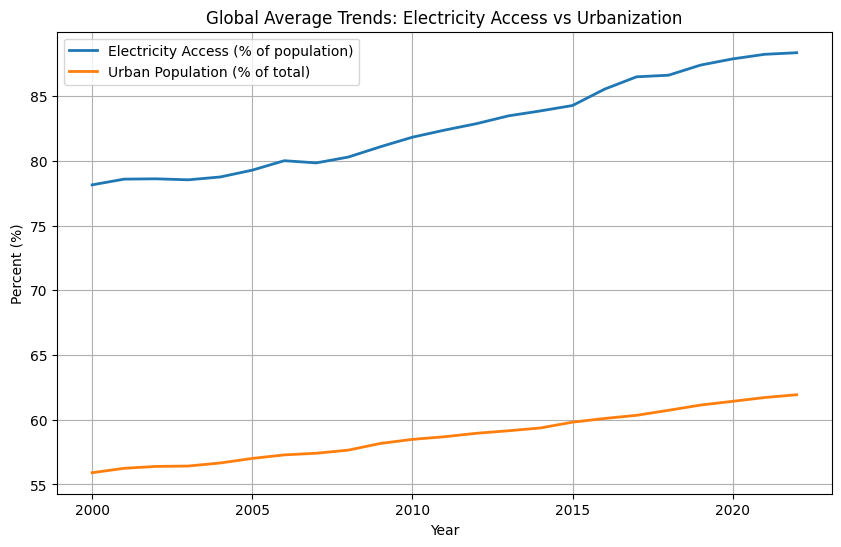

In [55]:
plt.figure(figsize=(10,6))

plt.plot(world_yearly['year'], world_yearly['electricity_access_%'], 
         label='Electricity Access (% of population)', linewidth=2)

plt.plot(world_yearly['year'], world_yearly['urban_population_%'], 
         label='Urban Population (% of total)', linewidth=2)

plt.title('Global Average Trends: Electricity Access vs Urbanization')
plt.xlabel('Year')
plt.ylabel('Percent (%)')
plt.legend()
plt.grid(True)
plt.show()


The global trend lines show that both electricity access and urbanization have steadily increased over the past two decades. Electricity access rose from around 78% in 2000 to nearly 90% by 2022, reflecting major progress in grid expansion and rural electrification efforts worldwide. Urbanization also increased gradually, from about 56% to over 62%, indicating continued movement of populations toward cities. Although electricity access grew at a faster rate, the parallel upward trajectories of both variables visually support the idea that rising urbanization is associated with improved electrification globally.

### Figure 3: Bin Plot of Electircy Access % by Urban Population Level

C:\Users\chenj\AppData\Local\Temp\ipykernel_55860\1272679231.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('urban_bin')['electricity_access_%']
C:\Users\chenj\AppData\Local\Temp\ipykernel_55860\1272679231.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


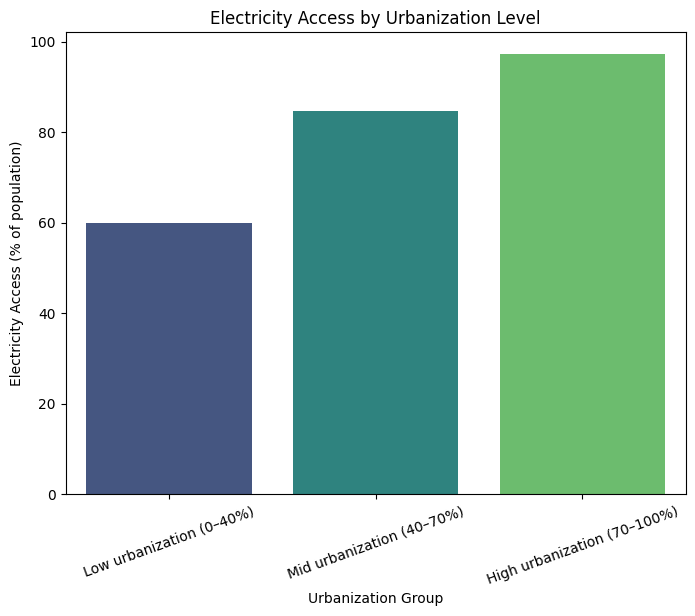

In [63]:
# Create bins for urban population %
bins = [0, 40, 70, 100]
labels = ['Low urbanization (0–40%)', 
          'Mid urbanization (40–70%)', 
          'High urbanization (70–100%)']

merged['urban_bin'] = pd.cut(
    merged['urban_population_%'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

bin_summary = (
    merged
    .groupby('urban_bin')['electricity_access_%']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,6))
sns.barplot(
    data=bin_summary,
    x='urban_bin',
    y='electricity_access_%',
    palette='viridis'
)
plt.title('Electricity Access by Urbanization Level')
plt.ylabel('Electricity Access (% of population)')
plt.xlabel('Urbanization Group')
plt.xticks(rotation=20)
plt.show()

Electricity access increases sharply with urbanization.
Countries with low urbanization (0–40%) have substantially lower access, indicating rural electrification remains a challenge.
Medium-urbanized countries see significant improvement, while highly urbanized countries (70–100%) approach universal electricity access.
This pattern supports the hypothesis that urbanization is positively associated with electricity access, likely due to infrastructure density and investment patterns.